In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed


Wczytywanie oraz przegląd danych

In [96]:
df = pd.read_csv('cars.csv')

In [97]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [98]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [100]:
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

Jedyne wartości null występują w kolumnie 'engine_capacity'. Takich wierszy jest jedynie 10 więc usuniemy je.

In [101]:
df.dropna(inplace= True)

Korelacja numerycznych kolumn

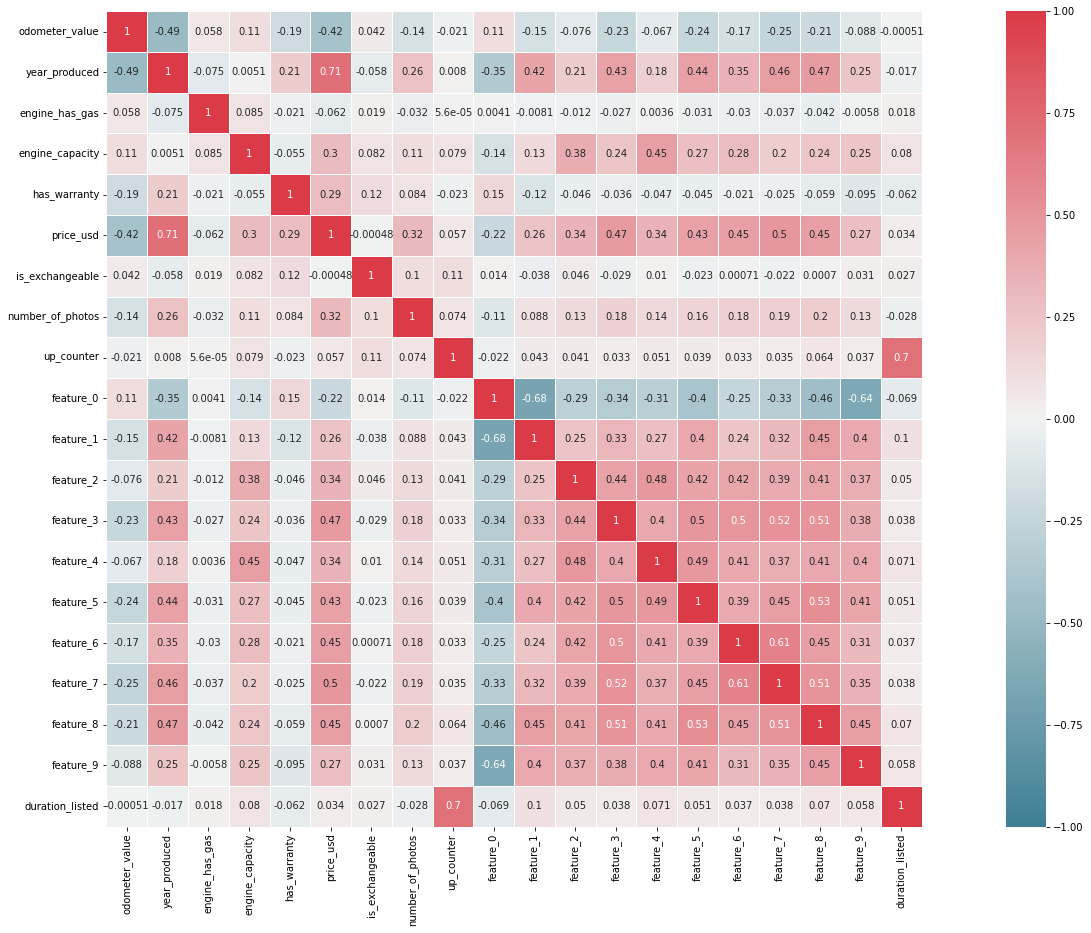

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
odometer_value,1.000000,-0.488448,0.057736,0.105704,-0.189577,-0.420965,0.042370,-0.143564,-0.020976,0.105763,-0.150917,-0.076118,-0.228871,-0.067241,-0.240714,-0.166202,-0.254130,-0.208665,-0.087696,-0.000508
year_produced,-0.488448,1.000000,-0.074637,0.005059,0.209322,0.705439,-0.057967,0.258064,0.007963,-0.346886,0.424832,0.205012,0.431164,0.184753,0.435081,0.345591,0.456776,0.465865,0.247295,-0.016916
engine_has_gas,0.057736,-0.074637,1.000000,0.084579,-0.020672,-0.062482,0.018654,-0.032076,0.000056,0.004063,-0.008063,-0.012023,-0.026994,0.003554,-0.031132,-0.030107,-0.036566,-0.041960,-0.005824,0.018252
engine_capacity,0.105704,0.005059,0.084579,1.000000,-0.054583,0.296597,0.081636,0.106691,0.079152,-0.142097,0.134315,0.375726,0.243494,0.452533,0.273235,0.284419,0.202070,0.240077,0.245828,0.080081
has_warranty,-0.189577,0.209322,-0.020672,-0.054583,1.000000,0.285749,0.117795,0.084079,-0.023089,0.149956,-0.121147,-0.046126,-0.036148,-0.046576,-0.044870,-0.021031,-0.024887,-0.058624,-0.094614,-0.061807
price_usd,-0.420965,0.705439,-0.062482,0.296597,0.285749,1.000000,-0.000479,0.316879,0.057470,-0.223799,0.255830,0.338086,0.470769,0.336178,0.434303,0.451518,0.498290,0.449049,0.266019,0.033662
is_exchangeable,0.042370,-0.057967,0.018654,0.081636,0.117795,-0.000479,1.000000,0.103671,0.106233,0.013860,-0.037900,0.045804,-0.029361,0.010232,-0.022659,0.000710,-0.021764,0.000703,0.031222,0.026929
number_of_photos,-0.143564,0.258064,-0.032076,0.106691,0.084079,0.316879,0.103671,1.000000,0.073880,-0.106402,0.087692,0.131210,0.177706,0.137325,0.162641,0.183710,0.192468,0.197432,0.132309,-0.028181
up_counter,-0.020976,0.007963,0.000056,0.079152,-0.023089,0.057470,0.106233,0.073880,1.000000,-0.022430,0.043400,0.040758,0.032909,0.050941,0.039308,0.033438,0.035379,0.063601,0.037186,0.698128
feature_0,0.105763,-0.346886,0.004063,-0.142097,0.149956,-0.223799,0.013860,-0.106402,-0.022430,1.000000,-0.676798,-0.292311,-0.335857,-0.307133,-0.404713,-0.247149,-0.325653,-0.458724,-0.638830,-0.068928


In [102]:
corr = df.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(30, 15))

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot= True,
            square=True,
            linewidths=.5)
plt.show()
corr

Kolumny feature zawierają informację o tym czy samochód określa konkretny dodatek. Zastąpmy ją kolumną mówiącą o ilości dodatków.

In [103]:
df['num_features'] = df.filter(regex = 'feature_.').sum(axis = 1)
df.drop(df.filter(regex = 'feature_.').columns, inplace = True, axis = 1)

In [104]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,num_features
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,False,owned,all,10900.00,False,Минская обл.,9,13,16,7
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,owned,all,5000.00,True,Минская обл.,12,54,83,4
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,owned,all,2800.00,True,Минская обл.,4,72,151,3
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,owned,all,9999.00,True,Минская обл.,9,42,86,1
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,False,owned,all,2134.11,True,Гомельская обл.,14,7,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,False,owned,front,2750.00,True,Минская обл.,5,85,301,5
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,False,owned,front,4800.00,True,Брестская обл.,4,20,317,5
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,False,owned,front,4300.00,False,Минская обл.,3,63,369,5
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,False,owned,front,4000.00,True,Брестская обл.,7,156,490,2


Sprawdźmy liczności poszczególnych grup

manufacturer_name 55
model_name 1116
transmission 2


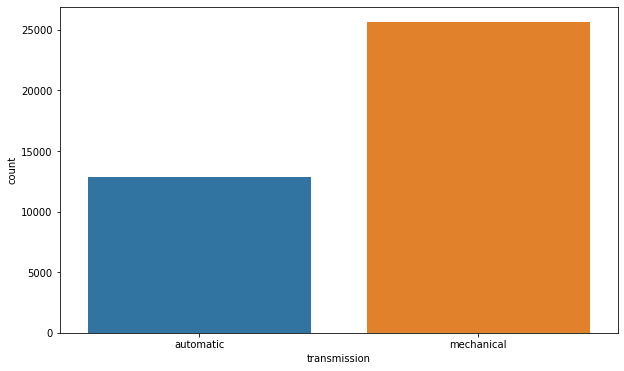

color 12


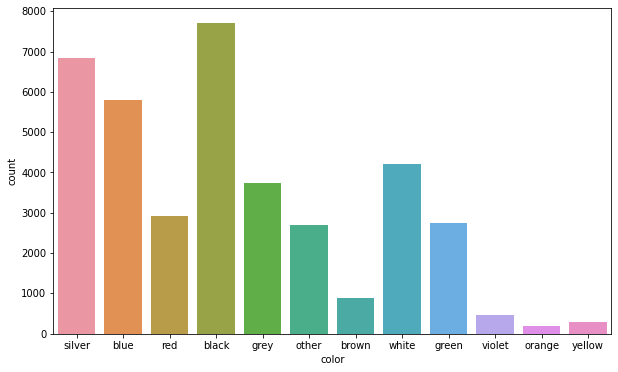

odometer_value 6060
year_produced 64
engine_fuel 5


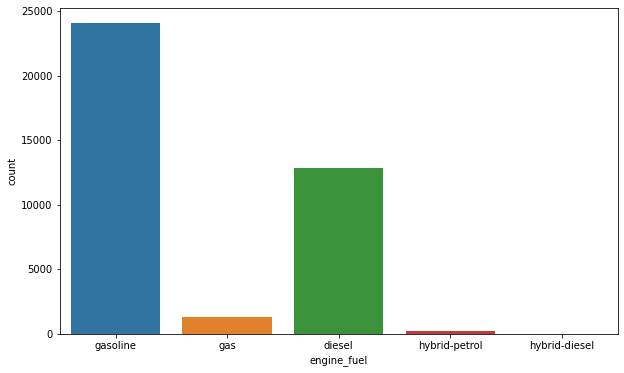

engine_has_gas 2


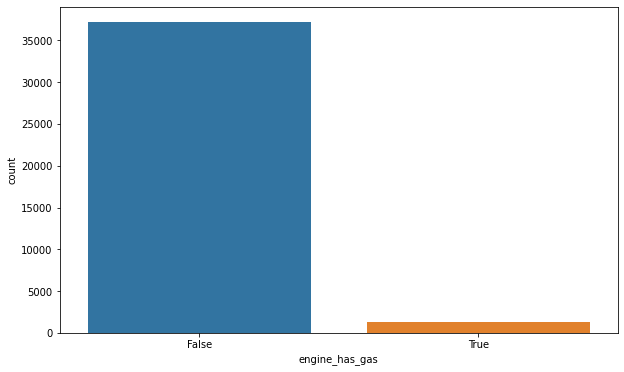

engine_type 2


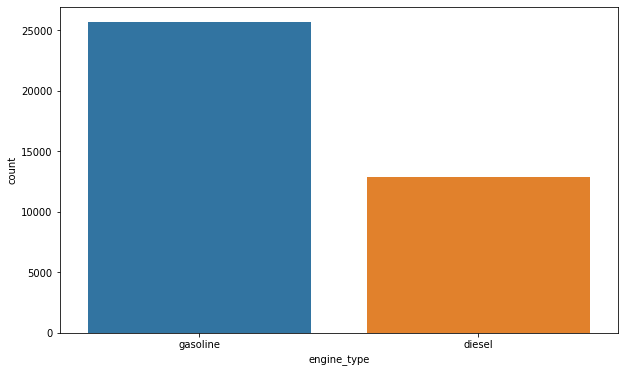

engine_capacity 61
body_type 12


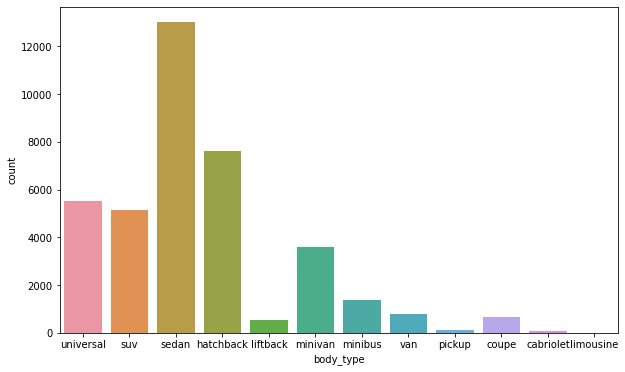

has_warranty 2


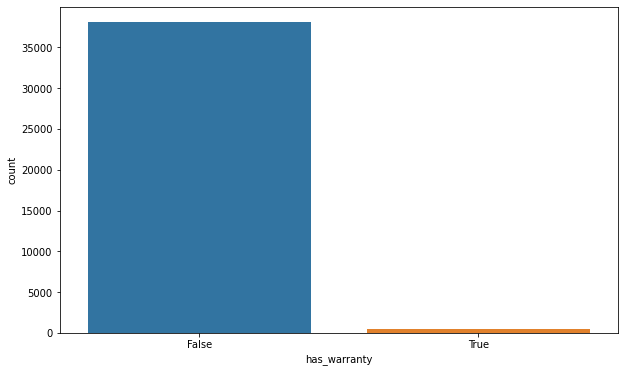

state 3


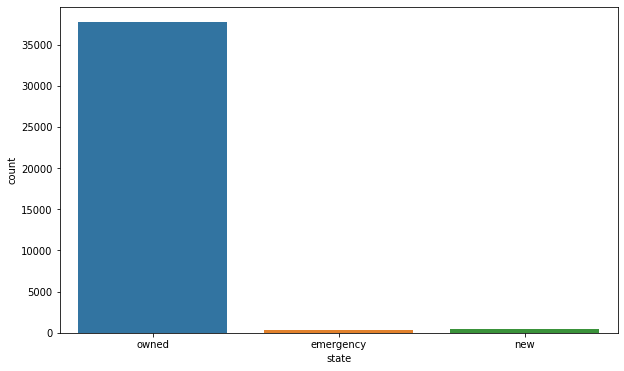

drivetrain 3


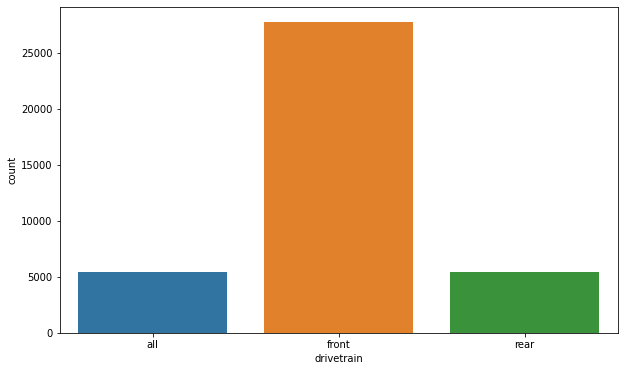

price_usd 2677
is_exchangeable 2


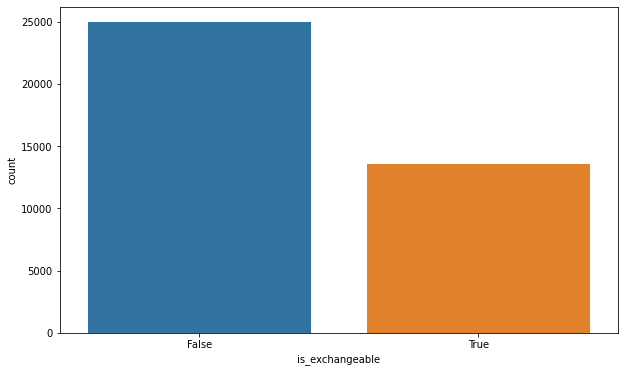

location_region 6


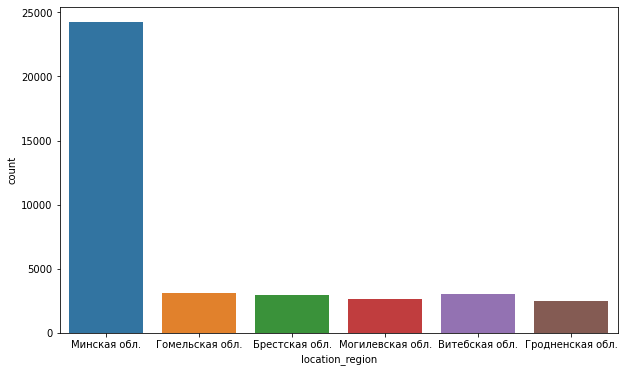

number_of_photos 61
up_counter 384
duration_listed 786
num_features 9


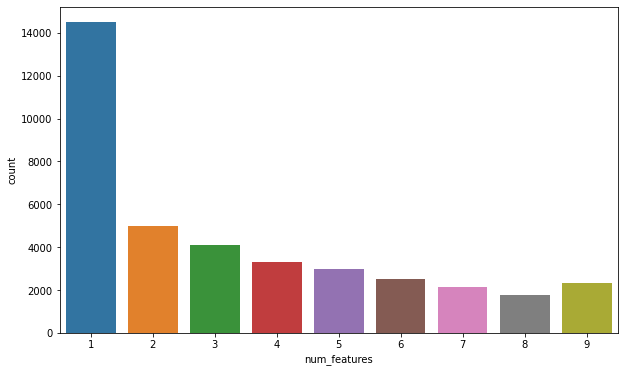

In [105]:
for col in df.columns:
  print(col, len(df[col].unique()))
  if len(df[col].unique()) < 20:
    plt.figure(figsize=(10, 6))
    sns.countplot(x= col, data=df)
    plt.show()

Zamieńmy kolumny engine_type oraz transmission na 0/1

In [106]:
df['transmission'] = df['transmission'].replace({'automatic': 0, 'mechanical': 1})
df['engine_type'] = df['engine_type'].replace({'gasoline': 0, 'diesel': 1})

In [107]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,num_features
0,Subaru,Outback,0,silver,190000,2010,gasoline,False,0,2.5,...,False,owned,all,10900.00,False,Минская обл.,9,13,16,7
1,Subaru,Outback,0,blue,290000,2002,gasoline,False,0,3.0,...,False,owned,all,5000.00,True,Минская обл.,12,54,83,4
2,Subaru,Forester,0,red,402000,2001,gasoline,False,0,2.5,...,False,owned,all,2800.00,True,Минская обл.,4,72,151,3
3,Subaru,Impreza,1,blue,10000,1999,gasoline,False,0,3.0,...,False,owned,all,9999.00,True,Минская обл.,9,42,86,1
4,Subaru,Legacy,0,black,280000,2001,gasoline,False,0,2.5,...,False,owned,all,2134.11,True,Гомельская обл.,14,7,7,4


Usuńmy kolumnę model_name ze względu na ilość unikalnych wartości

In [108]:
from sklearn.model_selection import train_test_split

X = df.drop(['price_usd', 'model_name'], axis = 1)
y = df['price_usd'].values
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [109]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

categorical = ['manufacturer_name', 'color', 'engine_fuel','body_type', 'state',
              'drivetrain', 'location_region']

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

enc = Pipeline([
        ("select_cat", DataFrameSelector(categorical)),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

X_train_full = enc.fit_transform(X_train_full)
X_test = enc.transform(X_test)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

print(X_train.shape)

(24652, 96)


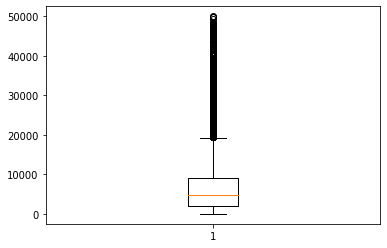

In [110]:
plt.boxplot(y_train)
plt.show()

In [111]:
from sklearn.model_selection import KFold
seed=123
kfold = KFold(n_splits=5, random_state=seed, shuffle = True)

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Modele płytkie

In [83]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


grid_params =  {
                      'scaler': [StandardScaler(), None],
}

grid_lin = GridSearchCV(pipe,
                    grid_params,
                    cv = kfold,
                    refit = True
)

grid_lin.fit(X_train, y_train)
grid_lin.best_params_

{'scaler': None}

In [84]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures()),
    ('regressor', LinearRegression())
])


grid_params =  {
                      'scaler': [StandardScaler(), None],
                      'preprocessor__degree': [1, 2]

}

grid_poly = GridSearchCV(pipe,
                    grid_params,
                    cv = kfold,
                    refit = True,
                    verbose = 2,
                    scoring = 'r2'
)

grid_poly.fit(X_train, y_train)
grid_poly.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....preprocessor__degree=1, scaler=StandardScaler(); total time=   0.1s
[CV] END ....preprocessor__degree=1, scaler=StandardScaler(); total time=   0.1s
[CV] END ....preprocessor__degree=1, scaler=StandardScaler(); total time=   0.1s
[CV] END ....preprocessor__degree=1, scaler=StandardScaler(); total time=   0.1s
[CV] END ....preprocessor__degree=1, scaler=StandardScaler(); total time=   0.1s
[CV] END ................preprocessor__degree=1, scaler=None; total time=   0.1s
[CV] END ................preprocessor__degree=1, scaler=None; total time=   0.1s
[CV] END ................preprocessor__degree=1, scaler=None; total time=   0.1s
[CV] END ................preprocessor__degree=1, scaler=None; total time=   0.1s
[CV] END ................preprocessor__degree=1, scaler=None; total time=   0.0s
[CV] END ....preprocessor__degree=2, scaler=StandardScaler(); total time=  57.3s
[CV] END ....preprocessor__degree=2, scaler=Stand

{'preprocessor__degree': 1, 'scaler': StandardScaler()}

In [85]:
from sklearn.linear_model import Ridge
pipe= Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures()),
    ('regressor', Ridge())
])


grid_params=  {
                      'scaler': [StandardScaler(), None],
                      'preprocessor__degree': [1, 2],
                      'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

grid_ridge = GridSearchCV(pipe,
                    grid_params,
                    cv = kfold,
                    refit = True,
                    verbose = 2,
                    scoring = 'r2'
)

grid_ridge.fit(X_train, y_train)
grid_ridge.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END preprocessor__degree=1, regressor__alpha=0.001, scaler=StandardScaler(); total time=   0.0s
[CV] END preprocessor__degree=1, regressor__alpha=0.001, scaler=StandardScaler(); total time=   0.0s
[CV] END preprocessor__degree=1, regressor__alpha=0.001, scaler=StandardScaler(); total time=   0.0s
[CV] END preprocessor__degree=1, regressor__alpha=0.001, scaler=StandardScaler(); total time=   0.0s
[CV] END preprocessor__degree=1, regressor__alpha=0.001, scaler=StandardScaler(); total time=   0.0s
[CV] END preprocessor__degree=1, regressor__alpha=0.001, scaler=None; total time=   0.0s
[CV] END preprocessor__degree=1, regressor__alpha=0.001, scaler=None; total time=   0.0s
[CV] END preprocessor__degree=1, regressor__alpha=0.001, scaler=None; total time=   0.0s
[CV] END preprocessor__degree=1, regressor__alpha=0.001, scaler=None; total time=   0.0s
[CV] END preprocessor__degree=1, regressor__alpha=0.001, scaler=None; total t

{'preprocessor__degree': 2, 'regressor__alpha': 10, 'scaler': None}

Sieć neuronowa

In [113]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [121]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import History, EarlyStopping, LearningRateScheduler

def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)

history = History()
model = Sequential()

early_stopping = EarlyStopping(monitor='loss', patience= 10, mode='min', verbose=1)

model.add(Dense(384, input_shape = (X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 384)               37248     
                                                                 
 batch_normalization_12 (Bat  (None, 384)              1536      
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 384)               0         
                                                                 
 dropout_12 (Dropout)        (None, 384)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               98560     
                                                                 
 batch_normalization_13 (Bat  (None, 256)              1024      
 chNormalization)                                     

In [122]:
model.compile(loss="mse",optimizer= 'adam', metrics = ["mae"])

model.fit(X_train_scaled, y_train, validation_data = (X_valid_scaled, y_valid) , batch_size=32, epochs=500, callbacks=[history, early_stopping, lrate])

Epoch 1/500
771/771 [==============================] - 4s 4ms/step - loss: 62690648.0000 - mae: 5434.1187 - val_loss: 27320248.0000 - val_mae: 3430.0867 - lr: 0.0100
Epoch 2/500
771/771 [==============================] - 3s 4ms/step - loss: 24715258.0000 - mae: 3287.0554 - val_loss: 20428824.0000 - val_mae: 3018.1196 - lr: 0.0100
Epoch 3/500
771/771 [==============================] - 3s 4ms/step - loss: 21877160.0000 - mae: 3181.4561 - val_loss: 19169766.0000 - val_mae: 2921.7307 - lr: 0.0100
Epoch 4/500
771/771 [==============================] - 3s 4ms/step - loss: 21102346.0000 - mae: 3120.7966 - val_loss: 19115744.0000 - val_mae: 2938.3672 - lr: 0.0100
Epoch 5/500
771/771 [==============================] - 3s 4ms/step - loss: 21000580.0000 - mae: 3117.3018 - val_loss: 19236126.0000 - val_mae: 2887.3352 - lr: 0.0100
Epoch 6/500
771/771 [==============================] - 4s 5ms/step - loss: 20548256.0000 - mae: 3075.4565 - val_loss: 18955776.0000 - val_mae: 2894.2920 - lr: 0.0100
Epoc

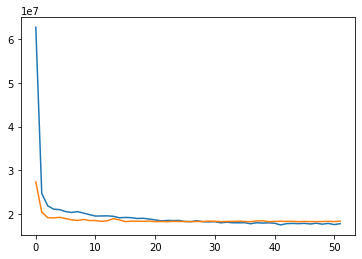

In [123]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.show()

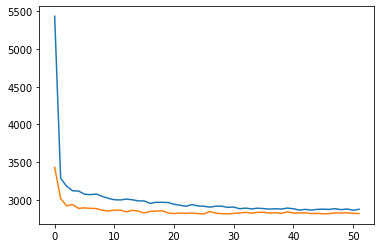

In [124]:
plt.plot(history.history['mae'], label = 'mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.show()

In [125]:
from sklearn import  metrics

model_names = []
models = []
models.append(grid_lin)
model_names.append('Regresja liniowa')
models.append(grid_poly)
model_names.append('Regresja wielomianowa')
models.append(grid_ridge)
model_names.append('Ridge')
models.append(model)
model_names.append('Siec neuronowa')

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in zip(model_names, models):
    if name != 'Siec neuronowa':
        r2.append(metrics.r2_score(y_test, model.predict(X_test)))
        explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
        median_absolute_error.append(metrics.median_absolute_error(y_test, model.predict(X_test)))
        mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
        mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))
    else:
        r2.append(metrics.r2_score(y_test, model.predict(X_test_scaled)))
        explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test_scaled)))
        median_absolute_error.append(metrics.median_absolute_error(y_test, model.predict(X_test_scaled)))
        mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test_scaled)))
        mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test_scaled)))

df_res = pd.DataFrame(list(zip(model_names, r2, explained_variance_score, median_absolute_error, mean_squared_error, mean_absolute_error)),
                         columns = ['Model', 'R^2', 'Explained variance score', 'Median absolute error', 'Mean squared error', 'Mean absolute errors'])
df_res


241/241 [==============================] - 0s 1ms/step


,Model,R^2,Explained variance score,Median absolute error,Mean squared error,Mean absolute errors
0,Regresja liniowa,0.481727,0.481774,2324.000000,2.185166e+07,3240.619576
1,Regresja wielomianowa,0.481096,0.481146,2324.000000,2.187826e+07,3242.203851
2,Ridge,0.555809,0.555809,1971.411448,1.872818e+07,2913.151115
3,Siec neuronowa,0.560864,0.561464,1882.708984,1.851503e+07,2825.491645
